In [3]:
ENV["PYTHONPATH"]="/home/gridsan/aligho/.local/lib/python3.8/site-packages/PyNormaliz-2.15-py3.8-linux-x86_64.egg";
using Crystalline, MPBUtils, SymmetryBases, JLD2, PyPlot, DelimitedFiles, PyCall, LinearAlgebra
shapely_point = pyimport("shapely.geometry").Point
shapely_polygon = pyimport("shapely.geometry.polygon").Polygon
cm = 1/2.54;

In [43]:
loaded_data_sg2_lightline = load("sg2_lightline.jld2")["well_separated_nodal_points"];
loaded_data_sg10_lightline = load("sg10_lightline.jld2")["well_separated_nodal_points"];
loaded_data_sg16_lightline = load("sg16_lightline.jld2")["well_separated_nodal_points"];

filtered_sample_infos_sg2 = filter(x -> !isempty(x[2]), loaded_data_sg2_lightline);
filtered_sample_infos_sg10 = filter(x -> !isempty(x[2]), loaded_data_sg10_lightline);
filtered_sample_infos_sg16 = filter(x -> !isempty(x[2]), loaded_data_sg16_lightline);
filtered_sample_infosv = [filtered_sample_infos_sg2, filtered_sample_infos_sg10, filtered_sample_infos_sg16];

In [12]:
calcnames = String[]
modes = ["te", "tm"]
sgnums = [2, 10, 16]
for mode in modes
    for sgnum in sgnums
        dir = "./output/zoom_in/sg$sgnum/eps3/$mode/"
        files = readdir(dir)
        for file in files
            try 
                readdlm(dir*file, ',')
                push!(calcnames, file)
            catch 
            end
        end
    end
end


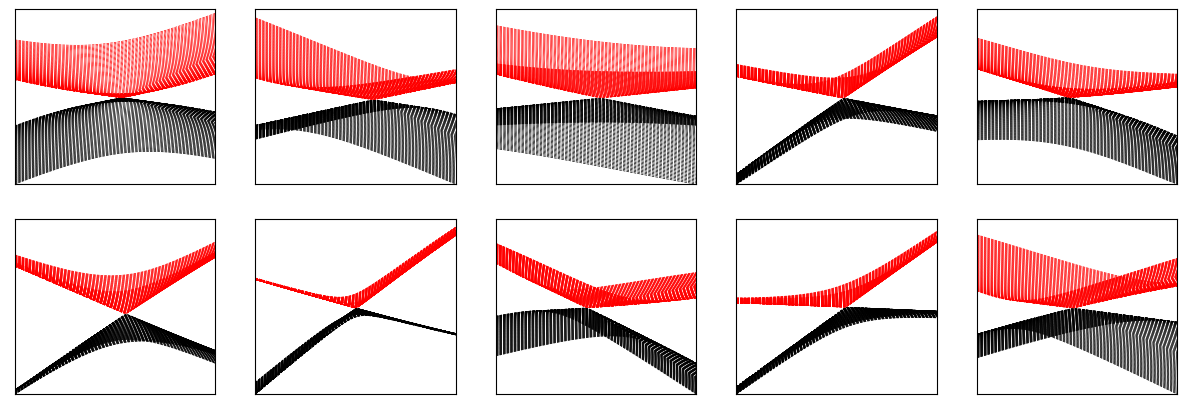

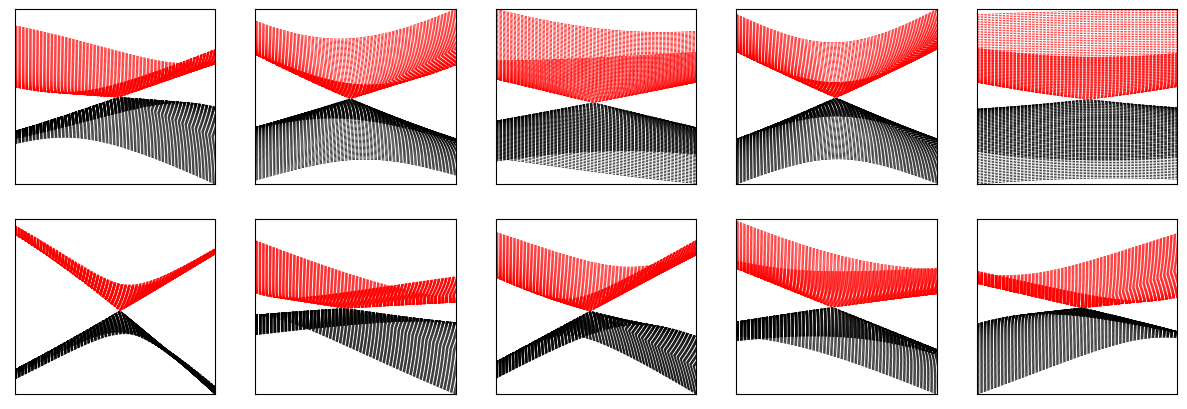

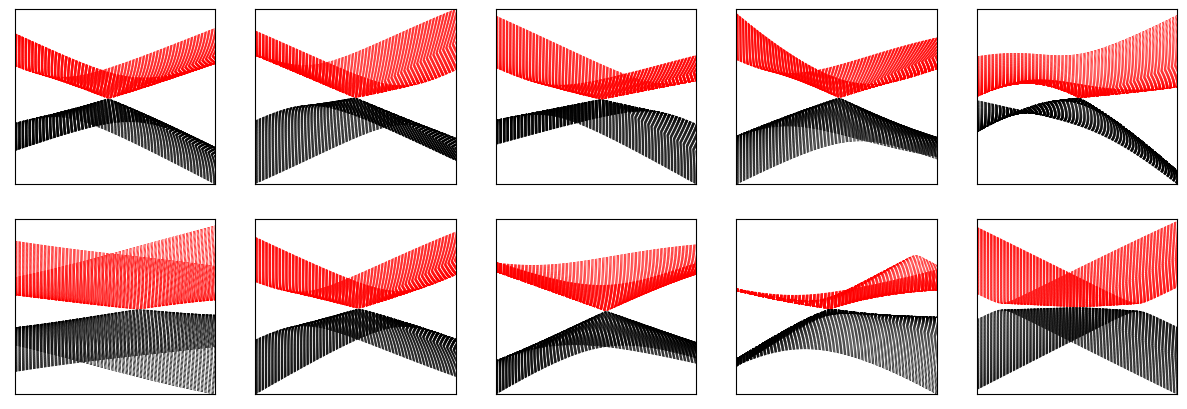

In [66]:
for (calc_idx, calcname) in enumerate(calcnames)
    (calc_idx ∈ [1, 11, 21]) && figure(figsize=(15, 5))
    subplot_idx = mod(calc_idx, 10)
    subplot_idx = (subplot_idx == 0 ? 10 : subplot_idx)
    subplot(2, 5, subplot_idx)
    sgnum = MPBUtils.parse_sgnum(calcname)
    filtered_sample_info = filtered_sample_infosv[findfirst(x -> isequal(x, sgnum), sgnums)]
    _, _, id, _, mode, _ = split(calcname, '-')
    id = parse(Int64, id)
    
    dir = "./output/zoom_in/sg$sgnum/eps3/$mode/"
    bands_zoomed_in = readdlm(dir * calcname, ',')[:, 6:end]
    dirac_point = filtered_sample_info[(mode, id+20000)][1][3]
    numbands = size(bands_zoomed_in)[2]
    bottom_band = numbands - 2
    top_band = numbands - 1
    bottom_band_dispersion = bands_zoomed_in[:, bottom_band]
    top_band_dispersion = bands_zoomed_in[:, top_band]
    for i in 0:101
        plot(bottom_band_dispersion[(1+i*102):102*(i+1)], color="black", linestyle="dashed", linewidth=0.5)
        plot(top_band_dispersion[(1+i*102):102*(i+1)], color="red", linestyle="dashed", linewidth=0.5)
    end
    xlim(0, 101)
    delta = max(maximum(top_band_dispersion .- dirac_point), maximum(dirac_point .- bottom_band_dispersion))
    delta_rounded = round(delta, digits=3) 
    ylim(dirac_point - delta, dirac_point + delta)
    xticks([])
    yticks([])
    #yticks([dirac_point - delta, dirac_point, dirac_point + delta], ["-$(delta_rounded)", "0", "$(delta_rounded)"])
end